In [7]:
import pandas as pd
import numpy as np
df=pd.DataFrame(np.random.randn(5,4),['A','B','C','D','E'],['w','x','y','z'])

In [8]:
df['w']

A    1.286958
B    1.527150
C    1.849242
D    1.393182
E    0.524377
Name: w, dtype: float64

In [9]:
df.loc['A']#to acces single row

w    1.286958
x    0.517208
y    0.065510
z   -0.841796
Name: A, dtype: float64

In [10]:
#To access multiple rows
df.loc[['A','C']]

,w,x,y,z
A,1.286958,0.517208,0.06551,-0.841796
C,1.849242,1.224014,1.01967,0.496177


In [11]:
#To access rows based on index position
df.iloc[3]#3 is index value

w    1.393182
x    1.670620
y   -0.967412
z    1.167249
Name: D, dtype: float64

In [12]:
#To get specific value of co-ordinate in a dataframe
df.loc['B','y']#syntax--df.loc(row,column)

-0.34594853800705283

In [13]:
#To get multiple co-ordinates.
df.loc[['A','B'],['w','z']]#df.loc[[rows],[colums]]

,w,z
A,1.286958,-0.841796
B,1.527150,-0.631003


In [14]:
#Retrive the data based on the condition 
df

,w,x,y,z
A,1.286958,0.517208,0.065510,-0.841796
B,1.527150,0.075107,-0.345949,-0.631003
C,1.849242,1.224014,1.019670,0.496177
D,1.393182,1.670620,-0.967412,1.167249
E,0.524377,0.173647,-0.611228,1.029075


In [15]:
#to get all values gretaer than zero
df>0

,w,x,y,z
A,True,True,True,False
B,True,True,False,False
C,True,True,True,True
D,True,True,False,True
E,True,True,False,True


In [16]:
df[df>0]

,w,x,y,z
A,1.286958,0.517208,0.06551,NaN
B,1.527150,0.075107,NaN,NaN
C,1.849242,1.224014,1.01967,0.496177
D,1.393182,1.670620,NaN,1.167249
E,0.524377,0.173647,NaN,1.029075


In [17]:
df['w']>0

A    True
B    True
C    True
D    True
E    True
Name: w, dtype: bool

In [18]:
df[df['w']>0]

,w,x,y,z
A,1.286958,0.517208,0.065510,-0.841796
B,1.527150,0.075107,-0.345949,-0.631003
C,1.849242,1.224014,1.019670,0.496177
D,1.393182,1.670620,-0.967412,1.167249
E,0.524377,0.173647,-0.611228,1.029075


In [19]:
d={"A":[1,2,np.nan],"B":[5,np.nan,np.nan],"C":[1,2,3],"D":[np.nan,np.nan,np.nan]}

In [20]:
df1=pd.DataFrame(d)
df1

,A,B,C,D
0,1.0,5.0,1,NaN
1,2.0,NaN,2,NaN
2,NaN,NaN,3,NaN


In [21]:
#To drop the values with a Nan for this we use dropna()
df1.dropna()


,A,B,C,D


In [22]:
#dropna(how,thresh,axis,inplace)
#how="all" or "any"
df1.dropna(how="all")#it will be checking the rows with all Nan values to delete that row

,A,B,C,D
0,1.0,5.0,1,NaN
1,2.0,NaN,2,NaN
2,NaN,NaN,3,NaN


In [23]:
df1.dropna(how="any")#it will delete the rows which have even single Nan value

,A,B,C,D


In [24]:
df1.dropna(how='all',axis=1)

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2
2,NaN,NaN,3


In [25]:
#To check the sum of Nan values in each column
df1.isna()

,A,B,C,D
0,False,False,False,True
1,False,True,False,True
2,True,True,False,True


In [26]:
df1.isna().sum()

A    1
B    2
C    0
D    3
dtype: int64

In [27]:
#thresh
df1.dropna(thresh=2)

,A,B,C,D
0,1.0,5.0,1,NaN
1,2.0,NaN,2,NaN


In [28]:
df1.dropna(thresh=2,axis=1)

,A,C
0,1.0,1
1,2.0,2
2,NaN,3


In [29]:
#fillna()
df1.fillna(value=0)

,A,B,C,D
0,1.0,5.0,1,0.0
1,2.0,0.0,2,0.0
2,0.0,0.0,3,0.0


In [30]:
df1

,A,B,C,D
0,1.0,5.0,1,NaN
1,2.0,NaN,2,NaN
2,NaN,NaN,3,NaN


In [31]:
df1['A'].fillna(value=df1['A'].mean())

0    1.0
1    2.0
2    1.5
Name: A, dtype: float64

In [32]:
df1.notna()

,A,B,C,D
0,True,True,True,False
1,True,False,True,False
2,False,False,True,False


In [33]:
#Group by
#To group based on column and perform aggregate functions

data={'company':['Google','Google','Meta','Meta','Fb','Fb'],"person":['Sam','mani','sai','prasanth','mohan','mounika'],'sales':[300,500,100,200,600,20]}

In [34]:
df2=pd.DataFrame(data)
df2

,company,person,sales
0,Google,Sam,300
1,Google,mani,500
2,Meta,sai,100
3,Meta,prasanth,200
4,Fb,mohan,600
5,Fb,mounika,20


In [35]:
bycomp=df2.groupby('company')
bycomp

In [36]:
bycomp.sum()['sales']

company
Fb        620
Google    800
Meta      300
Name: sales, dtype: int64

In [37]:
bycomp.value_counts() 

company  person    sales
Fb       mohan     600      1
         mounika   20       1
Google   Sam       300      1
         mani      500      1
Meta     prasanth  200      1
         sai       100      1
Name: count, dtype: int64

In [38]:
df2['company'].value_counts()

company
Google    2
Meta      2
Fb        2
Name: count, dtype: int64

In [39]:
#To get the maximum salary person from each company
df2.loc[bycomp['sales'].idxmax()][['person','sales']]
#or
bycomp[['person','sales']].max()#not working properly 

,person,sales
company,,
Fb,mounika,600
Google,mani,500
Meta,sai,200


In [40]:
bycomp.describe()

sales                                                      
        count   mean         std    min    25%    50%    75%    max
company                                                            
Fb        2.0  310.0  410.121933   20.0  165.0  310.0  455.0  600.0
Google    2.0  400.0  141.421356  300.0  350.0  400.0  450.0  500.0
Meta      2.0  150.0   70.710678  100.0  125.0  150.0  175.0  200.0

In [41]:
df=pd.read_csv(r"C:\Users\Manasa\OneDrive\Desktop\soc2/samplecsv.csv")
df

,Year,Industry_aggregation_NZSIOC,Industry_code_NZSIOC,Industry_name_NZSIOC,Units,Variable_code,Variable_name,Variable_category,Value,Industry_code_ANZSIC06
0,2020,Level 1,99999,All industries,Dollars (millions),H01,Total income,Financial performance,"733,258",ANZSIC06 divisions A-S (excluding classes K633...
1,2020,Level 1,99999,All industries,Dollars (millions),H04,"Sales, government funding, grants and subsidies",Financial performance,"660,630",ANZSIC06 divisions A-S (excluding classes K633...
2,2020,Level 1,99999,All industries,Dollars (millions),H05,"Interest, dividends and donations",Financial performance,"54,342",ANZSIC06 divisions A-S (excluding classes K633...
3,2020,Level 1,99999,All industries,Dollars (millions),H07,Non-operating income,Financial performance,"18,285",ANZSIC06 divisions A-S (excluding classes K633...
4,2020,Level 1,99999,All industries,Dollars (millions),H08,Total expenditure,Financial performance,"654,872",ANZSIC06 divisions A-S (excluding classes K633...
...,...,...,...,...,...,...,...,...,...,...
37075,2013,Level 3,ZZ11,Food product manufacturing,Percentage,H37,Quick ratio,Financial ratios,52,"ANZSIC06 groups C111, C112, C113, C114, C115, ..."
37076,2013,Level 3,ZZ11,Food product manufacturing,Percentage,H38,Margin on sales of goods for resale,Financial ratios,40,"ANZSIC06 groups C111, C112, C113, C114, C115, ..."
37077,2013,Level 3,ZZ11,Food product manufacturing,Percentage,H39,Return on equity,Financial ratios,12,"ANZSIC06 groups C111, C112, C113, C114, C115, ..."
37078,2013,Level 3,ZZ11,Food product manufacturing,Percentage,H40,Return on total assets,Financial ratios,5,"ANZSIC06 groups C111, C112, C113, C114, C115, ..."


In [42]:
df.head(10)#to get 10 rows

,Year,Industry_aggregation_NZSIOC,Industry_code_NZSIOC,Industry_name_NZSIOC,Units,Variable_code,Variable_name,Variable_category,Value,Industry_code_ANZSIC06
0,2020,Level 1,99999,All industries,Dollars (millions),H01,Total income,Financial performance,"733,258",ANZSIC06 divisions A-S (excluding classes K633...
1,2020,Level 1,99999,All industries,Dollars (millions),H04,"Sales, government funding, grants and subsidies",Financial performance,"660,630",ANZSIC06 divisions A-S (excluding classes K633...
2,2020,Level 1,99999,All industries,Dollars (millions),H05,"Interest, dividends and donations",Financial performance,"54,342",ANZSIC06 divisions A-S (excluding classes K633...
3,2020,Level 1,99999,All industries,Dollars (millions),H07,Non-operating income,Financial performance,"18,285",ANZSIC06 divisions A-S (excluding classes K633...
4,2020,Level 1,99999,All industries,Dollars (millions),H08,Total expenditure,Financial performance,"654,872",ANZSIC06 divisions A-S (excluding classes K633...
5,2020,Level 1,99999,All industries,Dollars (millions),H09,Interest and donations,Financial performance,"32,730",ANZSIC06 divisions A-S (excluding classes K633...
6,2020,Level 1,99999,All industries,Dollars (millions),H10,Indirect taxes,Financial performance,"7,509",ANZSIC06 divisions A-S (excluding classes K633...
7,2020,Level 1,99999,All industries,Dollars (millions),H11,Depreciation,Financial performance,"26,821",ANZSIC06 divisions A-S (excluding classes K633...
8,2020,Level 1,99999,All industries,Dollars (millions),H12,Salaries and wages paid,Financial performance,"119,387",ANZSIC06 divisions A-S (excluding classes K633...
9,2020,Level 1,99999,All industries,Dollars (millions),H13,Redundancy and severance,Financial performance,305,ANZSIC06 divisions A-S (excluding classes K633...


In [43]:
df.tail(5)

,Year,Industry_aggregation_NZSIOC,Industry_code_NZSIOC,Industry_name_NZSIOC,Units,Variable_code,Variable_name,Variable_category,Value,Industry_code_ANZSIC06
37075,2013,Level 3,ZZ11,Food product manufacturing,Percentage,H37,Quick ratio,Financial ratios,52,"ANZSIC06 groups C111, C112, C113, C114, C115, ..."
37076,2013,Level 3,ZZ11,Food product manufacturing,Percentage,H38,Margin on sales of goods for resale,Financial ratios,40,"ANZSIC06 groups C111, C112, C113, C114, C115, ..."
37077,2013,Level 3,ZZ11,Food product manufacturing,Percentage,H39,Return on equity,Financial ratios,12,"ANZSIC06 groups C111, C112, C113, C114, C115, ..."
37078,2013,Level 3,ZZ11,Food product manufacturing,Percentage,H40,Return on total assets,Financial ratios,5,"ANZSIC06 groups C111, C112, C113, C114, C115, ..."
37079,2013,Level 3,ZZ11,Food product manufacturing,Percentage,H41,Liabilities structure,Financial ratios,46,"ANZSIC06 groups C111, C112, C113, C114, C115, ..."


In [44]:
df=pd.read_csv(r"C:\Users\Manasa\OneDrive\Desktop\soc2/samplecsv.csv",header=4)#header--is used to mention column names of the
#data frame
df


,2020,Level 1,99999,All industries,Dollars (millions),H07,Non-operating income,Financial performance,"18,285","ANZSIC06 divisions A-S (excluding classes K6330, L6711, O7552, O760, O771, O772, S9540, S9601, S9602, and S9603)"
0,2020,Level 1,99999,All industries,Dollars (millions),H08,Total expenditure,Financial performance,"654,872",ANZSIC06 divisions A-S (excluding classes K633...
1,2020,Level 1,99999,All industries,Dollars (millions),H09,Interest and donations,Financial performance,"32,730",ANZSIC06 divisions A-S (excluding classes K633...
2,2020,Level 1,99999,All industries,Dollars (millions),H10,Indirect taxes,Financial performance,"7,509",ANZSIC06 divisions A-S (excluding classes K633...
3,2020,Level 1,99999,All industries,Dollars (millions),H11,Depreciation,Financial performance,"26,821",ANZSIC06 divisions A-S (excluding classes K633...
4,2020,Level 1,99999,All industries,Dollars (millions),H12,Salaries and wages paid,Financial performance,"119,387",ANZSIC06 divisions A-S (excluding classes K633...
...,...,...,...,...,...,...,...,...,...,...
37071,2013,Level 3,ZZ11,Food product manufacturing,Percentage,H37,Quick ratio,Financial ratios,52,"ANZSIC06 groups C111, C112, C113, C114, C115, ..."
37072,2013,Level 3,ZZ11,Food product manufacturing,Percentage,H38,Margin on sales of goods for resale,Financial ratios,40,"ANZSIC06 groups C111, C112, C113, C114, C115, ..."
37073,2013,Level 3,ZZ11,Food product manufacturing,Percentage,H39,Return on equity,Financial ratios,12,"ANZSIC06 groups C111, C112, C113, C114, C115, ..."
37074,2013,Level 3,ZZ11,Food product manufacturing,Percentage,H40,Return on total assets,Financial ratios,5,"ANZSIC06 groups C111, C112, C113, C114, C115, ..."


In [45]:
df=pd.read_csv(r"C:\Users\Manasa\OneDrive\Desktop\soc2\delimatercsv.csv", sep=';',names=['sid','ages','places'])
df



,sid,ages,places
0,Name,Age,City
1,Alice,25,New York
2,Bob,30,San Francisco
3,Charlie,22,Los Angeles


In [46]:
df_titanic=pd.read_csv(r"C:\Users\Manasa\OneDrive\Desktop\soc2\titanic_train.csv")
df_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [47]:
df_titanic=pd.read_csv(r"C:\Users\Manasa\OneDrive\Desktop\soc2\titanic_train.csv")
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [48]:
df_titanic=pd.read_csv(r"C:\Users\Manasa\OneDrive\Desktop\soc2\titanic_train.csv")
df_titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [49]:
df_titanic=pd.read_csv(r"C:\Users\Manasa\OneDrive\Desktop\soc2\titanic_train.csv")
df_titanic['Pclass'].value_counts()#to know no of classes present

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [50]:
df_titanic['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [51]:
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [52]:
df_titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [53]:
df_titanic.isna().sum()*100/len(df_titanic)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [54]:
#or
(df_titanic.isna().sum()/df_titanic.shape[0])*100


PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [55]:
((df_titanic.isna().sum()/df_titanic.shape[0])*100).max()





77.10437710437711

In [56]:
import matplotlib.pyplot as plt

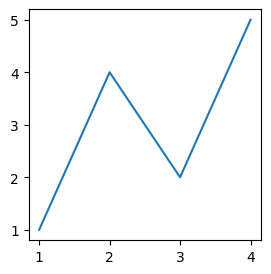

In [57]:
x=[1,2,3,4]
y=[1,4,2,5]

plt.figure(figsize=(3,3))
plt.plot(x,y)

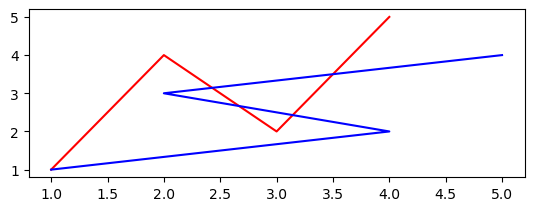

In [58]:
#plt.subplot(1,2,1)
#plt.plot(x,y,'b')

#plt subplot(1,2,1)
#plt plot(y,x,'g')

plt.subplot(2,1,2)
plt.plot(x,y,'r')
plt.subplot(2,1,2)
plt.plot(y,x,'b')


In [59]:
import numpy as np
years=np.random.randint(0,100)
years

24

In [60]:
x_years=np.arange(2000,2005,dtype=int)
y_innova=np.array([20,40,10,14,23])
y_honda_city=np.array([10,5,12,40,32])
x_years,y_innova,y_honda_city

(array([2000, 2001, 2002, 2003, 2004]),
 array([20, 40, 10, 14, 23]),
 array([10,  5, 12, 40, 32]))

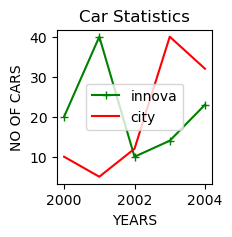

In [61]:
import matplotlib.pyplot as plt
plt.figure(figsize=(2,2))
plt.plot(x_years,y_innova,'-+g')
plt.plot(x_years,y_honda_city,'r')
plt.xlabel("YEARS")
plt.ylabel("NO OF CARS")
plt.title("Car Statistics")
plt.legend(['innova',"city"])



Text(0.5, 0, 'products')

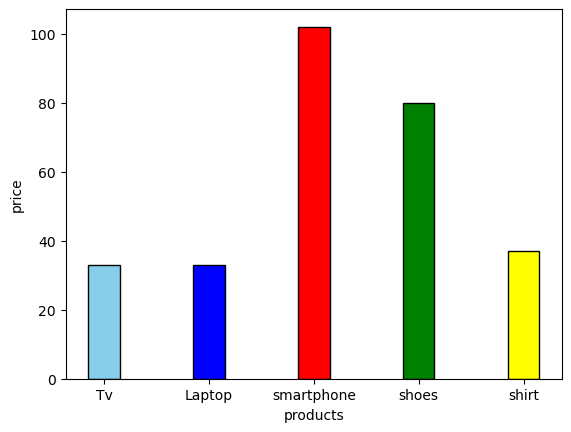

In [62]:
#barpolot
products=['Tv','Laptop','smartphone','shoes','shirt']
sales=np.random.randint(30,200,size=len(products))

plt.bar(products,sales,color=['skyblue','blue','red','green','yellow'],width=0.3,edgecolor='black',label="car starts")
plt.ylabel("price")
plt.xlabel("products")

([<matplotlib.patches.Wedge at 0x27060a34210>,
 [Text(1.0887106360927405, 0.15719144651837927, 'Lahari'),
  Text(0.49106705241258053, 0.9843033831267778, 'Lowkya'),
  Text(-1.0275368527515762, 0.39264235155849603, 'Aparna'),
  Text(-0.9239666581204178, -0.5968966532673702, 'Bindu'),
  Text(-0.6500388577795692, -0.8873835041156858, 'Sandhya'),
  Text(-0.16428385549765537, -1.0876630060927996, 'Sirisha'),
  Text(0.8002933742695859, -0.7546724555064935, 'Hasini')])

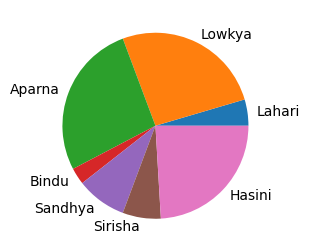

In [63]:
student_name=['Lahari','Lowkya','Aparna','Bindu','Sandhya','Sirisha','Hasini']
scores=[11,63,65,7,21,16,58]
plt.figure(figsize=(3,4))
plt.pie(scores,labels=student_name)


<BarContainer object of 2 artists>

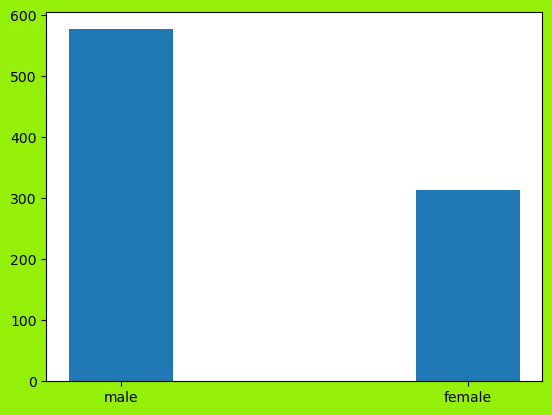

In [64]:
gender = ['male','female']
plt.figure(facecolor = "#94F008")
male = (df_titanic['Sex']=='male').sum()
female = (df_titanic['Sex']=='female').sum()
plt.bar(gender,[male,female],width=0.3)